**Disciplina RNA e Deep Learning**

**Alunas:**

Manuela de Lacerda Bezerra Carvalho (mlbc@cesar.school)

Valéria Cristina A.R. de Figueredo - (vcarf@cesar.school)

Tathiana de Souza Martins - tsm2@cesar.school

**Docente:** Vitor Casadei

# **1. Informações sobre o dataset**

DATASET: https://www.muratkoklu.com/datasets/

Citation Request :
KOKLU, M., KURSUN, R., TASPINAR, Y. S., and CINAR, I. (2021). Classification of Date Fruits into Genetic Varieties Using Image Analysis. Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293, DOI:10.1155/2021/4793293
https://www.hindawi.com/journals/mpe/2021/4793293/


Resumo: Há diversas frutas cultivadas ao redor do mundo, cada uma com vários tipos. Os fatores que determinam o tipo de fruta são as características da aparência externa, como cor, comprimento, diâmetro e formato. A aparência externa das frutas, portanto, é uma determinante importante do tipo de fruta. Determinar a variedade de frutas observando sua aparência externa pode exigir experiência, o que consome tempo e exige muito esforço.

Esse dataset especificou os tipos de tâmaras, que são Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi e Sagai. 898 imagens de sete tipos diferentes de tâmaras foram obtidas por meio do sistema de visão computacional (CVS). Por meio de técnicas de processamento de imagem, um total de 34 características, incluindo características morfológicas, formato e cor, foram extraídas dessas imagens e estão presentes no dataframe.

Nesse contexto, o presente trabalho utilizará  rede neural para classificar a variável "class" (target) desse dataset.


# **2. Importando as Bibliotecas**

In [1]:
!pip install ydata-profiling  # install the ydata-profiling package. Make sure the name is correct, it's 'ydata-profiling', not 'ydata_profiling'

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=017d60cc77a5392932a3a244d6437861273c08bf33ae3d482de2ec614ba1182c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
!pip install torch torchvision torchaudio

In [3]:
import pandas as pd
import torch

from torch.utils.data import Dataset, DataLoader

from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from torch.optim.lr_scheduler import StepLR


# **3. Baixando os dados**

In [4]:
url = 'https://raw.githubusercontent.com/tathi-martins/Dataframes/main/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'

df = pd.read_excel(url, engine='openpyxl')

# **4. Análise Exploratória**

In [5]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [6]:
df.shape

(898, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

As 35 colunas possuem tipos diversos: float, inteiro e objeto. Ocorre que o tipo objeto é "class", que precisará ser transformado via label encoder para poder ser manipulado, treinado via deep learning.

In [8]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


Esse dataset possui 898 elementos (linhas) e a variável "area" possui a maior média e o maior desvio padrão do dataset.

In [9]:
df['Class'].value_counts()

,count
Class,
DOKOL,204
SAFAVI,199
ROTANA,166
DEGLET,98
SOGAY,94
IRAQI,72
BERHI,65


In [10]:
# class
df['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [11]:
#converção de variável categórica em valores numéricos
le = preprocessing.LabelEncoder()
le.fit(df['Class'])
df['Class'] = le.transform(df['Class'])

In [12]:
df['Class'].unique()


array([0, 1, 2, 3, 4, 5, 6])

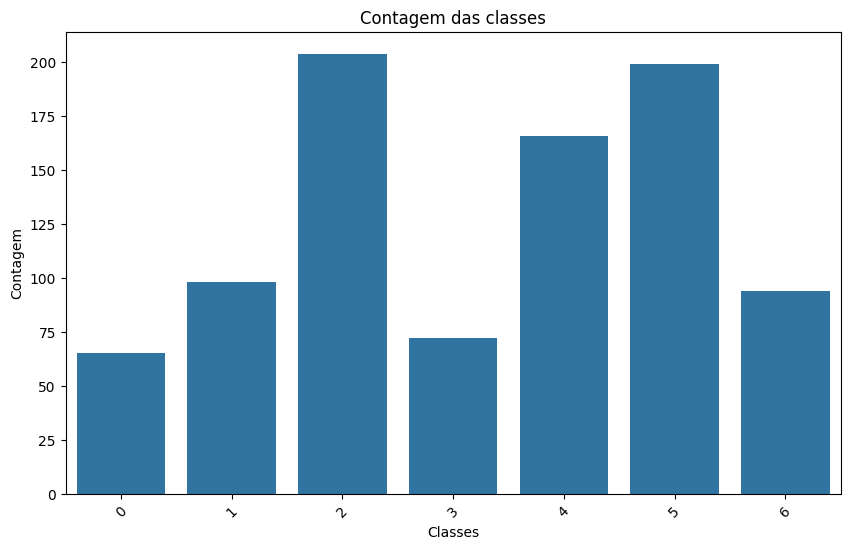

In [13]:
# Histograma das classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x ='Class')
plt.title('Contagem das classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

Esse dataset possui mais tâmaras da espécie DOKOL (2). A quantidade é 204 elementos.

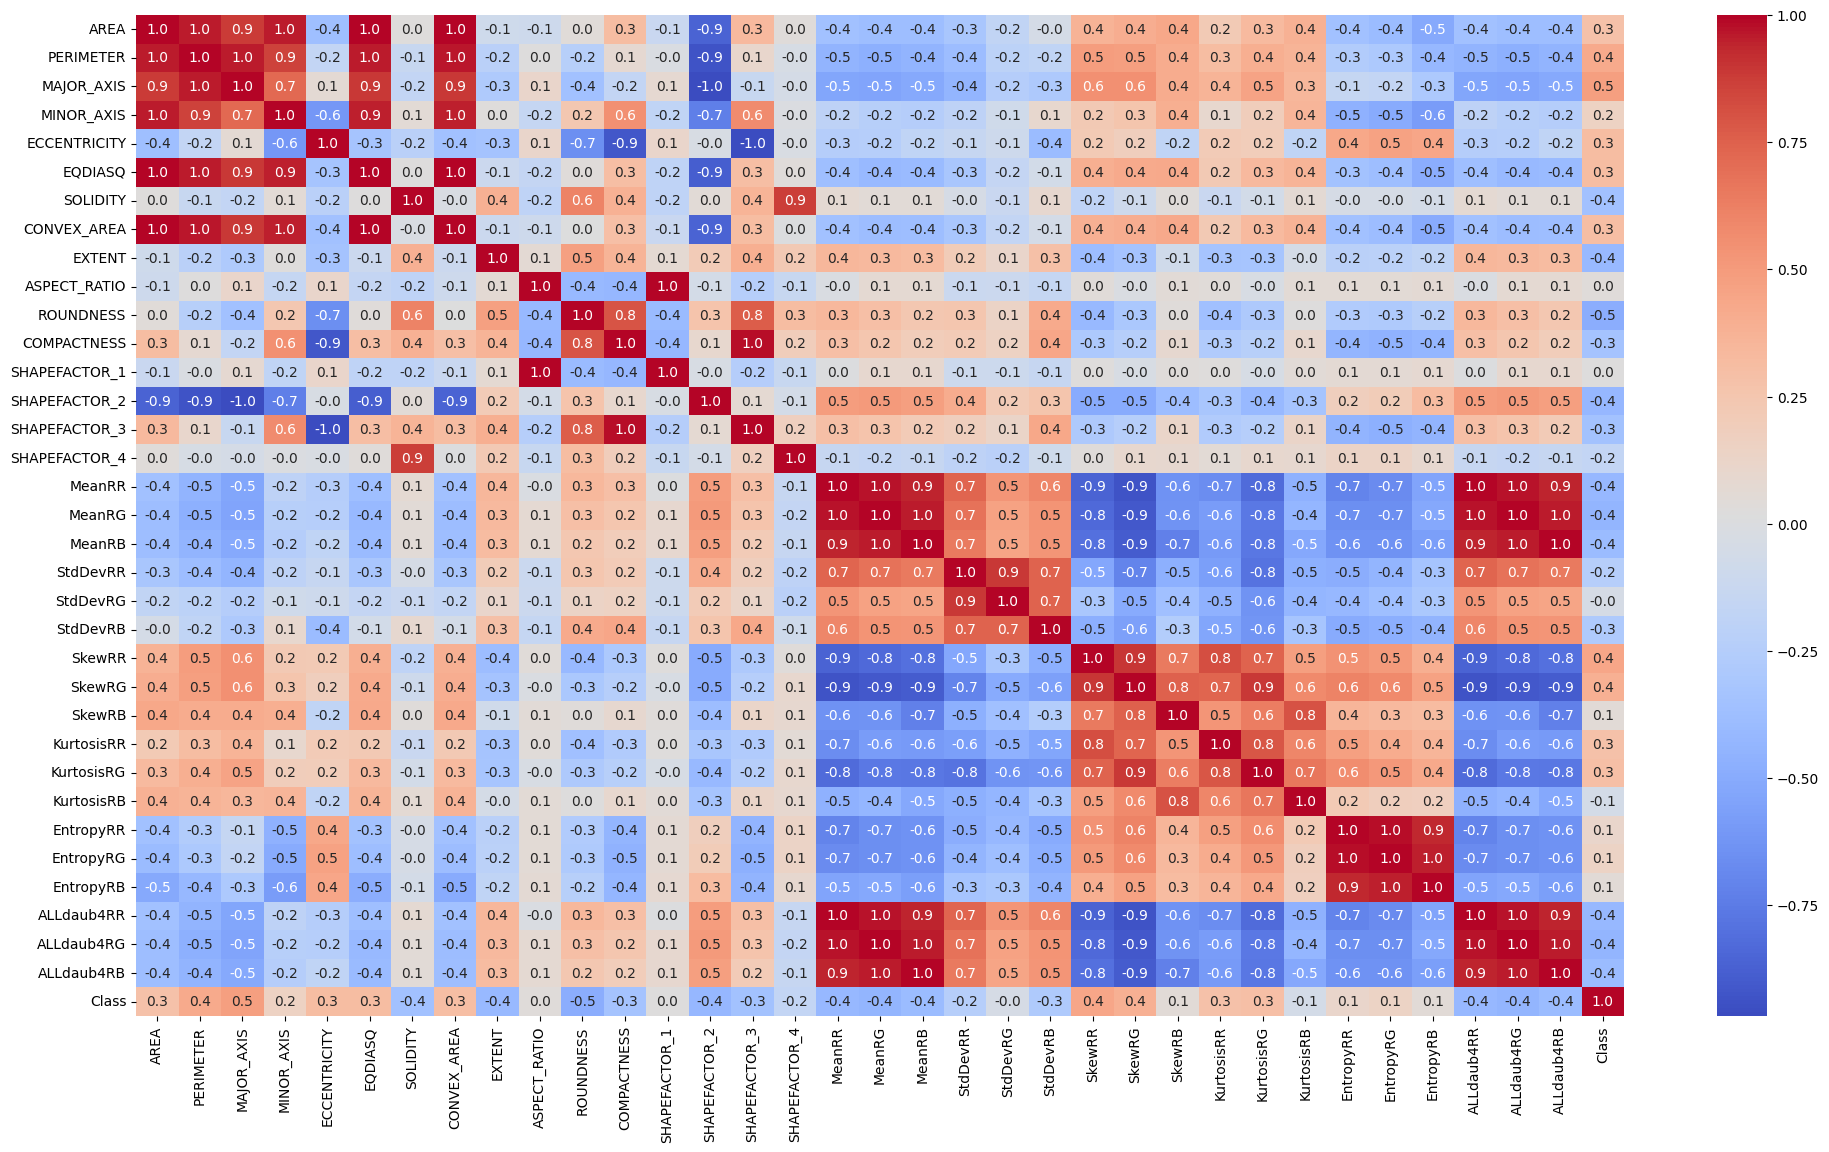

In [14]:
# Heatmap
plt.figure(figsize=(24, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

Em geral, a correlação não é alta nesse dataset. Entretanto, é possível verificar tal comportamento entre alguns elementos como entre área convexa e área, perímetro, eixo principal e eixo menor. O estado sólido (solidez) também tem relação com o formato fator 4.

In [15]:
df.isnull().sum()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


In [16]:
df.duplicated().sum()

0

Esse dataset não possui dados nulos ou duplicados. Portanto, não haverá limpeza dos dados.

# **4.1 Análise exploratória e estatística usando Y_data profiling**

In [17]:
#profile
profile = ProfileReport(df, title="Dates Dataset", html={"style": {"full_width": True}}, sort=None)

In [18]:
profile.to_file("dates_dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Abra o relatório gerado pelo y_data profiling: [Dates_dataset](/content/dates_dataset.html), se este link não funcionar tente este [link](https://drive.google.com/file/d/1xT2H0MlW1t0kgAyyuZlQNFLXqk9lCeyP/view?usp=sharing)

# **5. Separação treino/teste**

In [19]:
# Criando os inputs e labels
inputs = df.drop("Class", axis=1) #features
labels = pd.get_dummies(df["Class"], prefix="Class")


In [20]:
# Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=1111)



Dados de treino

Features

In [21]:
X_train

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
281,100471,1186.3730,437.8452,292.6243,0.7439,357.6642,0.9891,101577,0.7662,1.4963,...,0.2505,3.0952,3.1183,2.5561,-18344544256,-15797143552,-14251051008,66.1617,62.6151,59.3060
245,164567,1487.1000,534.5702,393.8198,0.6762,457.7480,0.9923,165851,0.8022,1.3574,...,0.1568,2.4141,2.8779,2.5941,-14026025984,-14014118912,-16140537856,45.6957,46.3607,49.5348
293,144815,1432.6450,530.4765,348.3135,0.7542,429.3998,0.9923,145945,0.7378,1.5230,...,-0.5594,4.4744,2.9591,2.7645,-36393275392,-35600490496,-29711974400,77.0256,76.9543,70.5632
368,399815,2296.2310,776.2232,658.5235,0.5294,713.4846,0.9924,402885,0.7555,1.1787,...,1.4515,10.8872,12.2215,7.1924,-12283793408,-16041399296,-18494177280,28.9866,32.1348,33.9988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,411708,2318.3440,805.4811,652.9468,0.5856,724.0186,0.9965,413165,0.7867,1.2336,...,1.8670,14.6318,13.6942,10.2999,-21918187520,-21830563840,-22435819520,37.0776,36.7169,36.3352
337,146017,1440.9980,536.7607,346.9765,0.7630,431.1782,0.9883,147745,0.7445,1.5470,...,0.2238,2.5621,2.6921,2.9658,-22185627648,-19937153024,-21190301696,60.0381,57.6532,59.4519
741,298236,2200.0559,868.1497,444.6231,0.8589,616.2190,0.9761,305552,0.6723,1.9526,...,1.4180,7.3413,7.3267,7.3823,-12590134272,-16542261248,-16204929024,30.7929,37.6608,38.3194
311,199707,1711.6780,663.8049,384.2429,0.8154,504.2567,0.9924,201232,0.7172,1.7276,...,-0.7426,2.4812,2.6765,2.7931,-41450606592,-43275087872,-38162923520,69.5798,71.4512,67.5481


Target - Labels

In [22]:
y_train


,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6
0,True,False,False,False,False,False,False
281,False,False,True,False,False,False,False
245,False,False,True,False,False,False,False
293,False,False,True,False,False,False,False
368,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
396,False,False,False,True,False,False,False
337,False,False,True,False,False,False,False
741,False,False,False,False,False,True,False
311,False,False,True,False,False,False,False


**Dados de teste**

**Features**

In [23]:
X_test

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
580,407286,2448.3840,870.6734,604.8426,0.7193,720.1199,0.9837,414030,0.7085,1.4395,...,-0.5768,2.6250,2.6536,2.6693,-65719709696,-61254365184,-56962736128,61.6770,60.0556,57.6007
224,242106,1897.2180,733.3027,424.0022,0.8159,555.2107,0.9891,244779,0.7937,1.7295,...,-0.2889,2.6340,2.8078,2.5781,-26404036608,-18962182144,-20471883776,50.8506,44.2080,45.5415
830,313487,2115.3440,753.2776,532.3475,0.7075,631.7785,0.9861,317896,0.7391,1.4150,...,0.1915,2.4395,2.6290,2.5984,-32971653120,-27716632576,-28547557376,50.4588,46.9223,46.9163
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260
879,376000,2405.4141,952.5737,506.6357,0.8468,691.9090,0.9826,382645,0.8080,1.8802,...,0.4828,2.3622,4.9643,3.6943,-30594353152,-19703881728,-31713038336,44.0476,36.1755,45.3407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,355294,2266.9509,870.8358,521.8104,0.8006,672.5878,0.9887,359343,0.7780,1.6689,...,0.4644,2.8609,4.5472,3.1222,-27548553216,-19063996416,-28639526912,43.8971,36.8984,44.4692
878,237986,1992.6890,759.7626,468.2187,0.7875,550.4663,0.8739,272332,0.7339,1.6227,...,0.1717,2.4284,2.0592,2.7886,-41070333952,-32324810752,-26784864256,63.4197,56.4588,52.7487
824,196561,1697.0870,631.0634,400.5577,0.7727,500.2692,0.9833,199909,0.7121,1.5755,...,-0.0587,2.0273,1.8135,2.1002,-32316256256,-26317094912,-21333108736,61.2456,55.2249,50.9283
25,381508,2239.7891,734.2203,666.2502,0.4202,696.9584,0.9919,384642,0.7398,1.1020,...,2.0740,6.6729,10.5392,9.3474,-25635362816,-25228310528,-28113027072,41.0071,41.1774,41.5364


**Target**

In [24]:
y_test

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6
580,False,False,False,False,True,False,False
224,False,False,True,False,False,False,False
830,False,False,False,False,False,False,True
896,False,False,False,False,False,False,True
879,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
833,False,False,False,False,False,False,True
878,False,False,False,False,False,False,True
824,False,False,False,False,False,False,True
25,True,False,False,False,False,False,False


In [25]:
print(f"Length of the Dataset:, {len(inputs)}")
print(f"Length of the Training Dataset:, {len(X_train)}")
print(f"Length of the Test Dataset:, {len(X_test)}")

Length of the Dataset:, 898
Length of the Training Dataset:, 718
Length of the Test Dataset:, 180


# **6. Transformação - Normalização**

In [26]:
# Normalizando com MinMax
scaler = MinMaxScaler()

# Ajustar e transformar os dados de entrada
X_train = scaler.fit_transform(X_train)  # Ajusta ao treino e transforma
X_test = scaler.transform(X_test)  # Transforma o teste com o mesmo escalador


A escolha do MinMaxScaler em vez do StandardScaler ocorreu para garantir que todos os dados estejam dentro de um intervalo específico, como 0, 1. Ele é útil em modelos que não lidam bem com valores negativos ou quando se precisa garantir que os dados estejam dentro de um intervalo restrito, como em Redes Neurais.

In [27]:
X_train

array([[0.77227446, 0.76939551, 0.56260577, ..., 0.67351302, 0.55053709,
        0.4946647 ],
       [0.18101148, 0.13441316, 0.1080185 , ..., 0.78855716, 0.67301352,
        0.71527246],
       [0.29881855, 0.29453956, 0.21794251, ..., 0.47193128, 0.41311029,
        0.52727294],
       ...,
       [0.5444993 , 0.67416314, 0.59704196, ..., 0.2413727 , 0.27400136,
        0.31148676],
       [0.36340511, 0.41411934, 0.36481245, ..., 0.84143798, 0.81430024,
        0.87385184],
       [0.83737566, 0.80842136, 0.56575024, ..., 0.34048343, 0.26789489,
        0.30263821]])

In [28]:
X_test

array([[0.74493086, 0.806389  , 0.59991004, ..., 0.71917516, 0.63208784,
        0.6824622 ],
       [0.44133356, 0.51291277, 0.44379386, ..., 0.55168183, 0.37868923,
        0.45044118],
       [0.57253031, 0.62905708, 0.46649452, ..., 0.54562036, 0.42209011,
        0.47689256],
       ...,
       [0.35762283, 0.40635015, 0.32760308, ..., 0.71250104, 0.55484632,
        0.55408411],
       [0.69755145, 0.69531965, 0.44483667, ..., 0.39939478, 0.3302308 ,
        0.37338238],
       [0.53750028, 0.57940478, 0.42429779, ..., 0.52739264, 0.3193418 ,
        0.3909525 ]])

In [29]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,...,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.547129,0.600748,0.464665,0.648661,0.596249,0.709225,0.901469,0.550616,0.650795,0.002266,...,0.315614,0.105794,0.140253,0.068526,0.674706,0.665224,0.651320,0.538700,0.452846,0.498136
std,0.197369,0.216629,0.161640,0.151268,0.138105,0.152806,0.117457,0.197834,0.156424,0.037289,...,0.158308,0.120039,0.150902,0.071459,0.206912,0.198563,0.187360,0.248754,0.225675,0.209138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.378250,0.425518,0.341198,0.526586,0.509615,0.592261,0.882618,0.379180,0.565717,0.000554,...,0.204451,0.033655,0.034419,0.026703,0.545468,0.552563,0.547337,0.350536,0.295256,0.318283
50%,0.586286,0.678011,0.513422,0.646691,0.624924,0.751697,0.937811,0.593401,0.683484,0.000856,...,0.285595,0.057747,0.060111,0.043140,0.708791,0.687328,0.694485,0.600672,0.477043,0.530379
75%,0.705371,0.773604,0.584875,0.772367,0.697039,0.830263,0.965174,0.707328,0.766356,0.001136,...,0.399130,0.119255,0.228238,0.084544,0.847796,0.836560,0.793150,0.737272,0.624427,0.663604
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Anteriormente, já foi realizada a transformação da variável categórica "Class" em variável numérica, com labelEncoder

# **7. Criando o dataset usando o from torch.utils.data**

In [30]:
# Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels.values.argmax(axis=1), dtype=torch.long)  # Converte para índices

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


In [31]:
# Criar datasets PyTorch
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Criar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

# **8. Definição da Rede**

In [32]:
import torch.nn as nn
import torch.nn.functional as F

In [33]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()

        # Definição das camadas
        self.fc1 = nn.Linear(input_size, 128)  # Primeira camada totalmente conectada
        self.relu1 = nn.ReLU()                # Função de ativação para fc1
        self.fc2 = nn.Linear(128, 64)         # Segunda camada totalmente conectada
        self.relu2 = nn.ReLU()                # Função de ativação para fc2
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        # Forward pass com as camadas e ativações
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x


In [34]:
model_size = X_train.shape[1]
output_size = y_train.shape[1]

model = Net(model_size, output_size)

In [35]:
print(output_size)

7


In [36]:
print(model_size)

34


# **9. Definição do otimizador e da função de perda**

In [37]:
import torch.optim as optim

In [38]:
criterion = nn.CrossEntropyLoss()  # Para classificação
optimizer = optim.Adam(model.parameters(), lr=0.001)


# **10.Criação do objeto de treinamento e teste**

In [39]:
def train(model, dry_run, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)  # Converte dados para float
        target = target.to(device).long()  # Converte rótulos para long (índices de classe)

        # Forward pass
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)

        # Backward pass e atualização
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
            if dry_run:
                break


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target = target.to(device).long()  # Converte rótulos para long
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)\n')


# **11.Treinamento e Avaliação**

In [40]:
# Configuração do dispositivo
use_cuda = torch.cuda.is_available()

torch.manual_seed(1111)

device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': 64}
test_kwargs = {'batch_size': 1000}

if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

# Certifique-se de mover o modelo para o dispositivo correto
model = model.to(device)

# Loop de treinamento
dry_run = False
epochs = 30

for epoch in range(1, epochs + 1):
    train(model, dry_run, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)



Train Epoch: 1 [0/718 (0%)]	Loss: 1.959668
Train Epoch: 1 [640/718 (83%)]	Loss: 1.856157

Test set: Average loss: 0.0204, Accuracy: 114/180 (63%)

Train Epoch: 2 [0/718 (0%)]	Loss: 1.850677
Train Epoch: 2 [640/718 (83%)]	Loss: 1.722532

Test set: Average loss: 0.0191, Accuracy: 115/180 (64%)

Train Epoch: 3 [0/718 (0%)]	Loss: 1.857853
Train Epoch: 3 [640/718 (83%)]	Loss: 1.598151

Test set: Average loss: 0.0175, Accuracy: 113/180 (63%)

Train Epoch: 4 [0/718 (0%)]	Loss: 1.606498
Train Epoch: 4 [640/718 (83%)]	Loss: 1.513621

Test set: Average loss: 0.0154, Accuracy: 113/180 (63%)

Train Epoch: 5 [0/718 (0%)]	Loss: 1.339327
Train Epoch: 5 [640/718 (83%)]	Loss: 1.351452

Test set: Average loss: 0.0137, Accuracy: 115/180 (64%)

Train Epoch: 6 [0/718 (0%)]	Loss: 1.333562
Train Epoch: 6 [640/718 (83%)]	Loss: 1.084214

Test set: Average loss: 0.0121, Accuracy: 115/180 (64%)

Train Epoch: 7 [0/718 (0%)]	Loss: 1.036329
Train Epoch: 7 [640/718 (83%)]	Loss: 1.032208

Test set: Average loss: 0.01

# **12.Salvar o modelo treinado**

In [41]:
torch.save(model.state_dict(), "dates_model.pt")


# **13. Conclusões**

Esse dataset especificou os tipos de tâmaras, que são Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi e Sagai. Nesse contexto, o presente trabalho buscou realizar a classificação do target "Class"(tipos, classes de tâmaras), via Deep Learning.

Primeiro ocorreu a importação de bibliotecas e os dados foram baixados. Depois ocorreu análise exploratória a fim de melhorar o entendimento sobre o dataset. Algumas conclusões foram tecidas ao longo do trabalho.

Ocorreu a separação do dataset entre treino e teste para futuro treinamento e averiguação, bem como normalização.

Sobre o modelo de Deep Learning, primeiro foi definida a rede, o otimizador e a função de perda. Depois foi estruturada a função de treinamento e teste, bem como realizada a avaliação.

Esse treinamento foi salvo para possíveis novos treinamentos e melhorias. No dataset de teste, a acurácia final foi 84 % e a perda média foi 0.0046. E no dataset de treino, a acurácia final foi 83%, de modo que ocorreu uma boa generalização, treinamento. A pequena diferença entre as perdas nos treinamentos e no teste é um bom sinal, sugerindo que o modelo está generalizando bem (aprendendo de forma eficaz) e não está sobreajustando aos dados de treinamento.

Enfim, está equilibrado entre underfitting e overfitting. Ele não está subajustando (underfitting), pois o training loss não é muito alto. Tampouco está sobreajustando (overfitting), pois a diferença entre os dois valores não é muito grande.
